# Git-Punch Notebook
### Brief

Scatter chart (similar to a punchcard) showing all the commits for a git repository done across the days of the week (y-axis) and time of day (x-axis).

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

# Enable inline plotting
%matplotlib inline

In [355]:
# Read the raw json file
data_location = r'../tmp/data.json'
# convert_axes is True by default
# changed to False in order not to
# convert the days to dates
rdata = pd.read_json(data_location, convert_axes=True)

In [356]:
# Sort the index
rdata.sort(axis=0, ascending=True, inplace=True)
# Sort the columns
rdata.sort(axis=1, ascending=True, inplace=True)

In [357]:
# Convert Timestamp to Weekday
rdata.columns = rdata.columns.map(lambda x: x.strftime('%a'))

In [358]:
# This is to be excuted once and only once!
# This will convert the index to column and vice versa
rdata = rdata.transpose()

In [359]:
# The below code has been modified from its original form found below
# http://stackoverflow.com/questions/14849815/matplotlib-how-to-remove-the-vertical-space-when-displaying-circles-on-a-grid
# Original author: http://stackoverflow.com/users/2023144/rgiot

# ax1 : Days of the week
ax1 = range(7)
# ax2 : Hours per day
ax2 = range(24)
# Ticks
ax1_ticks = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax2_ticks = range(24)

# Convert the DataFrame to a 2D Array
data = np.zeros((len(ax1),len(ax2)))
for i in xrange(7):
    for j in xrange(24):
        data[i,j] = rdata.iloc[i, j]

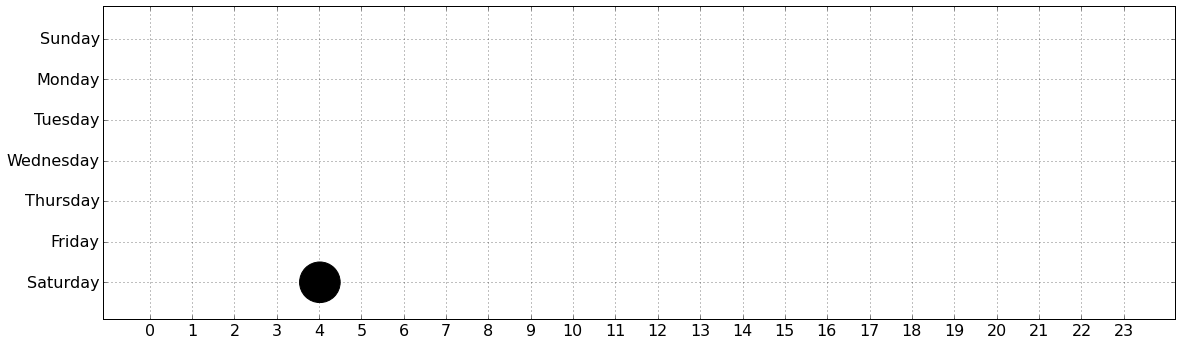

In [360]:
data = data/float(np.max(data))

# Shape Ratio
r = float(data.shape[1])/data.shape[0]

# Draw the Circles
for y in xrange(data.shape[0]):
    for x in xrange(data.shape[1]):
        # Define the circle properties
        circle = plt.Circle((x/float(data.shape[1])*data.shape[0]+0.39,y/r), 
                            data[y][x]/float(data.shape[1])*data.shape[0]/2, 
                            facecolor =(0,0,0))
        # Draw the circle
        plt.gca().add_artist(circle)

# Define the plot properties
plt.ylim(0-0.5, data.shape[0]-0.5)
plt.yticks(np.arange(0,len(ax1)/r-.1,1/r), 
           ax1_ticks)

plt.xlim(0, data.shape[0])
plt.xticks(np.linspace(0, len(ax1), len(ax2)) + 8/float(data.shape[1]), 
           ax2_ticks)

plt.tick_params(axis='both', which='major', labelsize=16)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Invert axes
plt.gca().invert_yaxis()
# Enable the grid
plt.grid(True)

# Make sure the axes are equal, 
# and resize the canvas to fit the plot
plt.axis('equal')
plt.axis([0, 7.7, 8.5/r, -0.7])
scale = 0.8
plt.gcf().set_size_inches(data.shape[1]*scale,data.shape[0]*scale, forward=True)

# Show the plot
plt.show()